# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape


(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

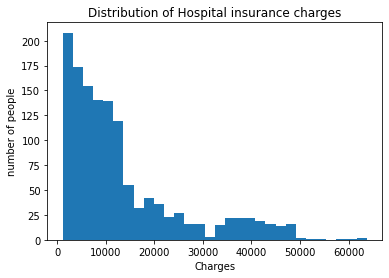

In [9]:

_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Hospital insurance charges')


In [12]:

mean1=medical.charges.mean()

print('Sample mean',mean1)

sd1=np.sqrt(sum(((medical.charges-mean1)**2)/(len(medical)-1)))
print('Sample standard deviation:',sd1)

Sample mean 13270.422265141257
Sample standard deviation: 12110.011236694003


It seems that the distribution that is skewed right, here the few charges that exceed 20,000 can be as high as 60,000. Becuase of this the mean value may be affected.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

We can make a log normal transformation of the charges and make a hypothesis test with H0: Assuming that the data in Normally distributed. 

In [26]:
ln_charges=np.log(medical.charges)
ln_mean1=ln_charges.mean()

print('Sample mean',ln_mean1)

ln_sd1=np.sqrt(sum(((ln_charges-ln_mean1)**2)/(len(ln_charges)-1)))
print('Sample standard deviation:',ln_sd1)

Sample mean 9.098658729424768
Sample standard deviation: 0.9195271129310929


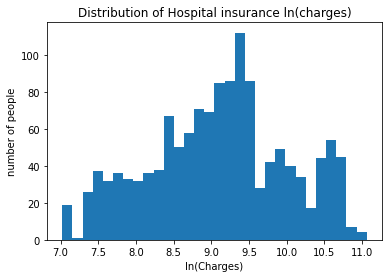

In [19]:
#Now we can test if the ln(charges) are normally distributed
_ = plt.hist(ln_charges, bins=30)
_ = plt.xlabel('ln(Charges)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of Hospital insurance ln(charges)')

In [25]:
import scipy.stats 
test=np.log(12000)
prob_200=scipy.stats.norm(ln_mean1, ln_sd1).cdf(test)
print('p-value:',1-prob_200)
#This is an extreme value to be observed
#The probability of have a height of 2m or less is:
print('The probability of have a height of 2m or less is:',prob_200)

p-value: 0.3745853555186608
The probability of have a height of 2m or less is: 0.6254146444813392


In [32]:

# Example of the Shapiro-Wilk Normality 
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.
from scipy.stats import shapiro

stat, p = shapiro(ln_charges)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.983, p=0.000
Probably not Gaussian


In [33]:

# Example of the Anderson-Darling Normality Test
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.
from scipy.stats import anderson

result = anderson(ln_charges)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=3.930
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


In [40]:
#The administrator is concerned that the actual average charge has fallen below 12,000. To test that it has actually gone 
#below 12,000, we can have the following Hypothesis test done:
# Assume tht  H0: The mean charge is equal to 12,000 and HA: That the mean charge is less than 12,000.
#threatening the hospital's operational model
import statsmodels.api as sm
sm.stats.ztest(ln_charges,value=np.log(12000),alternative='smaller')

(-11.695413302781953, 6.726532052750372e-32)

Since p-value (0) is lower that the standard confidence level 0.05, we can reject the Null hypothesis tha the mean of charges is equal to 12000. There is a strong evidence in support for the alternative hypothesis that the mean of charges is, in fact less than 12000

__A:__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [50]:
from scipy.stats import t
m_error=t.ppf(.95,1338 , loc=ln_mean1, scale=ln_sd1)*ln_sd1/np.sqrt(len(ln_charges))
print('Margin of error:',m_error)

Margin of error: 0.26677287537245625


In [52]:
#The confidence interval is:
L1=ln_mean1-m_error
L2=ln_mean1+m_error
print(L1)

real_limit1=np.exp(L1)
real_limit2=np.exp(L2)
print('The confidence interval is:(',real_limit1,',',real_limit2,')')

8.831885854052311
The confidence interval is:( 6849.191218903121 , 11677.64494694535 )


There is evidence to believe that the

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__We are asuming that both samples have the same variance.

In [89]:
#Q4 

sm.stats.ttest_ind(no_ins, y_ins,alternative='two-sided')#***

(-8.730056978927314, 7.457051964482356e-18, 1336.0)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [70]:
no_ins=np.log(medical.charges.loc[medical['insuranceclaim']==0])
y_ins=np.log(medical.charges.loc[medical['insuranceclaim']==1])
no_mean=no_ins.mean()
y_mean=y_ins.mean()
print('Sample No insuranme mean:',no_mean,'Sample has insuranme mean:',y_mean)

no_sd=np.sqrt(sum(((no_ins-no_mean)**2)/(len(no_ins)-1)))
print('Sample standard deviation of no insurance:',no_sd)

y_sd=np.sqrt(sum(((y_ins-y_mean)**2)/(len(y_ins)-1)))
print('Sample standard deviation of no insurance:',no_sd)


Sample No insuranme mean: 8.8450270988383 Sample has insuranme mean: 9.278435938844293
Sample standard deviation of no insurance: 0.7042058646453686
Sample standard deviation of no insurance: 0.7042058646453686


In [76]:
#Sample standard deviation
sp=np.sqrt(((((len(no_ins)-1)*no_sd**2)+(len(y_ins)-1)*y_sd**2)/(len(no_ins)+len(y_ins)-2)))
print('Sample standard deviation:',sp)
#t-test statistic
tstat=(no_mean-y_mean)/(sp*np.sqrt(1/len(no_ins)+1/len(y_ins)))
print('t statistic:',tstat)

Sample standard deviation: 0.8947052851114325
t statistic: -8.730056978927596


In [88]:
#Calculation of p-value
from scipy.stats import t
df=len(no_ins)+len(y_ins)-2
t_value=t.cdf(np.abs(tstat), df)

p_value=2*(1-t_value)
print('the p-value for the assumed symetric distribution:',p_value)

the p-value for the assumed symetric distribution: 0.0


In [ ]:
The results are the same.

We can reject the Null hypothesis that the mean of both groups are equal.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I was not able to find it in scipy for I was able to find it in statsmodels.api

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test